In [2]:
# installation
#!brew install graphviz
#!pip install pygraphviz

In [4]:
from datascience import *
from IPython.display import Image
import pygraphviz as PG
%matplotlib inline

In [5]:
tbl = Table().read_table('TU 38 master - Sheet1.csv')
tbl

section,substance,utensil,number,quantity,measurement,position,material,offering,deity,Days,Month,MonthName,frequency tag,decorations,additional
1,barley beer,sappu,3,nan,nan,right offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,labku beer,sappu,4,nan,nan,right offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,barley beer,sappu,3,nan,nan,left offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,labku beer,sappu,1,nan,nan,left offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,nasu beer,sappu,1,nan,nan,left offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,zarbabu beer,sappu,1,nan,nan,left offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,milk,sappu,1,nan,nan,left offering table,alabaster,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,drawn wine,sappu,4,nan,nan,offering table,gold,rabu morning,Anu,365,12,nan,every day entire year,nan,nan
1,barley beer,sappu,3,nan,nan,right offering table,gold,tardennu morning,Anu,365,12,nan,every day entire year,nan,nan
1,barley beer,sappu,3,nan,nan,right offering table,gold,rabu evening,Anu,365,12,nan,every day entire year,nan,nan


In [8]:
slct = tbl.select('deity', 'position', 'utensil', 'substance')
slct.show(2)

deity,position,utensil,substance
Anu,right offering table,sappu,barley beer
Anu,right offering table,sappu,labku beer


In [9]:
anu = slct.where('deity', 'Anu')
anu

deity,position,utensil,substance
Anu,right offering table,sappu,barley beer
Anu,right offering table,sappu,labku beer
Anu,left offering table,sappu,barley beer
Anu,left offering table,sappu,labku beer
Anu,left offering table,sappu,nasu beer
Anu,left offering table,sappu,zarbabu beer
Anu,left offering table,sappu,milk
Anu,offering table,sappu,drawn wine
Anu,right offering table,sappu,barley beer
Anu,right offering table,sappu,barley beer


In [15]:
permutations = anu.group(['deity', 'position', 'utensil', 'substance']).drop('count')
permutations_original = permutations.copy()


count = 0
while count < permutations.num_columns-1:
    changed = permutations.apply((lambda x,y: x + ' ' + y), [count,count+1])
    count += 1
    permutations[permutations.labels[count]] = changed
permutations

/Users/ronaldwalker/anaconda/lib/python3.5/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


deity,position,utensil,substance
Anu,Anu cella,Anu cella sappu,Anu cella sappu Izallu wine
Anu,Anu cella,Anu cella sappu,Anu cella sappu barley beer
Anu,Anu cella,Anu cella sappu,Anu cella sappu drawn wine
Anu,Anu cella,Anu cella sappu,Anu cella sappu labku beer
Anu,Anu cella,Anu cella sappu,Anu cella sappu milk
Anu,Anu cella,Anu cella sappu,Anu cella sappu nasu beer
Anu,Anu left offering table,Anu left offering table sappu,Anu left offering table sappu barley beer
Anu,Anu left offering table,Anu left offering table sappu,Anu left offering table sappu labku beer
Anu,Anu left offering table,Anu left offering table sappu,Anu left offering table sappu milk
Anu,Anu left offering table,Anu left offering table sappu,Anu left offering table sappu nasu beer


/Users/ronaldwalker/anaconda/lib/python3.5/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


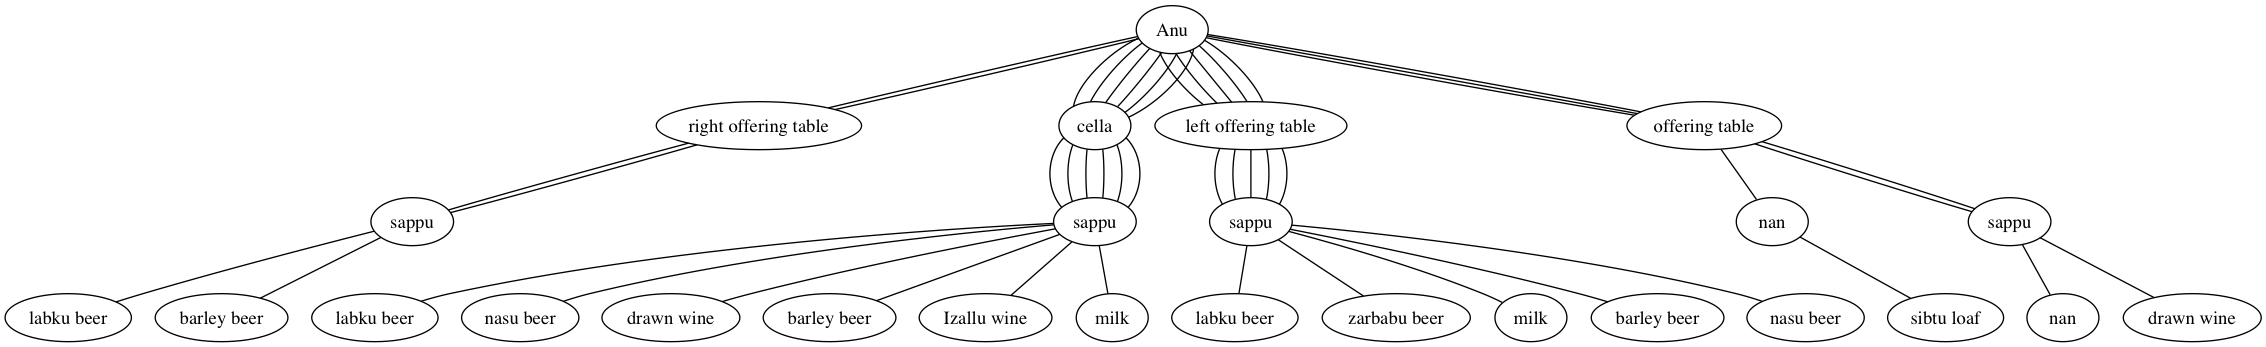

In [82]:
B = PG.AGraph(strict=False)

label_dictionary = {}


for row in range(permutations_original.num_rows):
    graph_row = permutations_original.take(row)
    key_row = permutations.take(row)
    for i in range(permutations_original.num_columns):
        label_dictionary[key_row.get(i)[0]] = graph_row.get(i)[0]
label_dictionary


for x in label_dictionary.keys():
    B.add_node(x, label=label_dictionary[x])

count = 0
while count < permutations.num_columns-1:
    permutations.apply((lambda x,y: B.add_edge(x, y)), [count,count+1])
    count += 1
    


# save the graph in dot format
B.write('ademo.dot')

# pygraphviz renders graphs in neato by default, 
# so you need to specify dot as the layout engine
B.layout(prog='dot')
B.draw('file.png')
Image('file.png')

/Users/ronaldwalker/anaconda/lib/python3.5/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


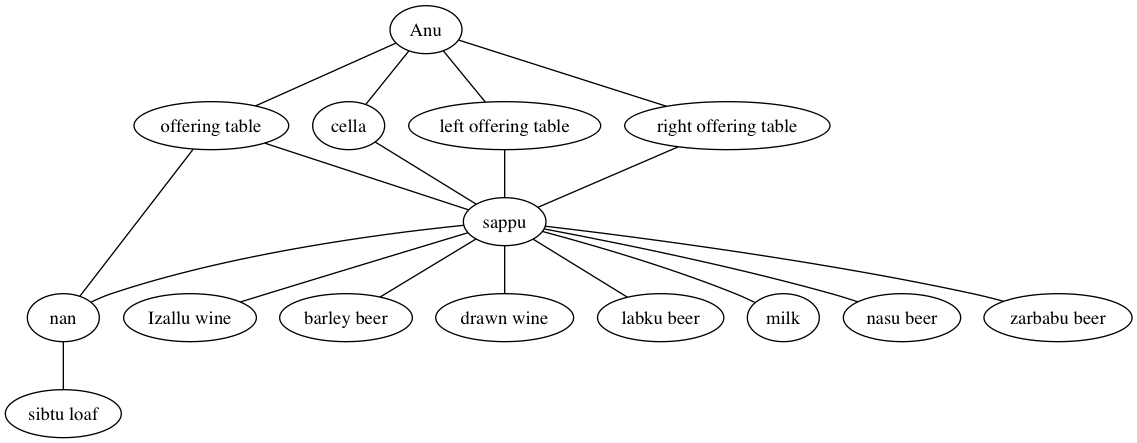

In [83]:
B = PG.AGraph(strict=True)


row = 0
while row < permutations.num_rows:
    graph_row = permutations_original.take(row)
    key_row = permutations.take(row)
    
    count = 0
    while count < permutations.num_columns-1:
        permutations_original.apply((lambda x,y: B.add_edge(x, y)), [count,count+1])
        count += 1
    row+=1
    


# save the graph in dot format
B.write('ademo.dot')

# pygraphviz renders graphs in neato by default, 
# so you need to specify dot as the layout engine
B.layout(prog='dot')
B.draw('file.png')
Image('file.png')